In [1]:
import os
import sys
import time
from pathlib import Path
import glob
import random

import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf

In [2]:
data_folder = "../../data/" # root data folder

# path to spectrogram dataset
dir = data_folder + 'images/'

In [3]:
def load_image(image_path):
    """Load image
    :param image_path: path to image to load
    :return: loaded image
    """
    temp_img = Image.open(image_path+'.png') # read in image
    img = temp_img.copy()
    img = np.asarray(img, dtype=np.uint8)
    temp_img.close()
    img = img / 255.0 # scale intensity to between 0 and 1
    return img

In [4]:
# create list of traces in the image datset
print('Creating seismic trace list')
p_traces_array = []
s_traces_array = []
noise_traces_array = []
for filename in glob.iglob(os.path.join(dir, 'P/*.png'), recursive=True): # loop through every file in the directory and get trace names from the image files
    p_traces_array.append(filename[0:-4]) # remove .png from image file names
for filename in glob.iglob(os.path.join(dir, 'S/*.png'), recursive=True): # loop through every file in the directory and get trace names from the image files
    s_traces_array.append(filename[0:-4]) # remove .png from image file names
for filename in glob.iglob(os.path.join(dir, 'noise/*.png'), recursive=True): # loop through every file in the directory and get trace names from the image files
    noise_traces_array.append(filename[0:-4]) # remove .png from image file names
print(f'Num noise: {len(noise_traces_array)}\nNum P-waves: {len(p_traces_array)}\nNum S-waves: {len(s_traces_array)}')

Creating seismic trace list
Num noise: 200000
Num P-waves: 81500
Num S-waves: 81500


In [9]:
# Created by DAVIDS
# https://www.kaggle.com/davids1992/specaugment-quick-implementation
def spec_augment(spec: np.ndarray, num_mask=2, 
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.15):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num, _ = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0
    
    return spec


Text(0.5, 1.0, 'Spectrogram Augmented')

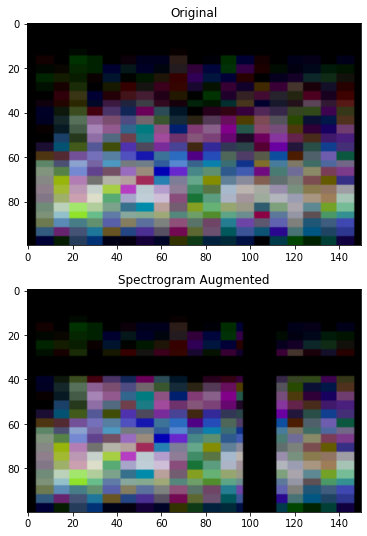

In [11]:
trace_pth = random.choice(p_traces_array)
img = load_image(trace_pth)
img_aug = spec_augment(img)

fig, ax = plt.subplots(2,1, figsize=(16,9))
ax[0].imshow(img)
ax[1].imshow(img_aug)
ax[0].set_title("Original")
ax[1].set_title("Spectrogram Augmented")